# Линейная регрессия

In [20]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

class SLE( nn.Module ):
    def __init__(self):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(1,1)
        )

    def forward(self, x):
        return self.fc( x )

In [21]:
# sle = SLE()
# все то же самое работает без создания класса
sle = nn.Linear(1,1)
sle

Linear(in_features=1, out_features=1, bias=True)

In [22]:
#print( sle.fc[0].weight )
#print( sle.fc[0].bias )
print( sle.weight )
print( sle.bias )

Parameter containing:
tensor([[-0.5284]], requires_grad=True)
Parameter containing:
tensor([0.4007], requires_grad=True)


In [23]:
x = torch.linspace(0, 1., 10, requires_grad=True).view(-1,1)
x

tensor([[0.0000],
        [0.1111],
        [0.2222],
        [0.3333],
        [0.4444],
        [0.5556],
        [0.6667],
        [0.7778],
        [0.8889],
        [1.0000]], grad_fn=<ViewBackward0>)

In [24]:
sle_pred = sle(x)
sle_pred

tensor([[ 0.4007],
        [ 0.3420],
        [ 0.2833],
        [ 0.2246],
        [ 0.1659],
        [ 0.1071],
        [ 0.0484],
        [-0.0103],
        [-0.0690],
        [-0.1277]], grad_fn=<AddmmBackward0>)

In [25]:
#sle.fc[0].weight * x + sle.fc[0].bias
sle.weight * x + sle.bias

tensor([[ 0.4007],
        [ 0.3420],
        [ 0.2833],
        [ 0.2246],
        [ 0.1659],
        [ 0.1071],
        [ 0.0484],
        [-0.0103],
        [-0.0690],
        [-0.1277]], grad_fn=<AddBackward0>)

In [26]:
# check NN == W*x+b
# torch.equal( sle_pred, sle.fc[0].weight * x + sle.fc[0].bias)
torch.equal( sle_pred, sle.weight * x + sle.bias)

True

In [27]:
# y - измерение выходных значений линейное + рандомный шум, например, неточноть измерения 
# y = Ax + B + noise
A = -1
B = 0.5
K_deviation = 0.05
y = A*x + B + torch.randn( x.shape[0],1)*K_deviation
y

tensor([[ 0.4696],
        [ 0.4620],
        [ 0.2505],
        [ 0.1107],
        [ 0.1028],
        [ 0.0029],
        [-0.2217],
        [-0.3047],
        [-0.2895],
        [-0.5198]], grad_fn=<AddBackward0>)

### До обучения

In [28]:
#print( sle.fc[0].weight )
#print( sle.fc[0].bias )
print( sle.weight )
print( sle.bias )

Parameter containing:
tensor([[-0.5284]], requires_grad=True)
Parameter containing:
tensor([0.4007], requires_grad=True)


Text(0.5, 1.0, 'Линейная регрессия')

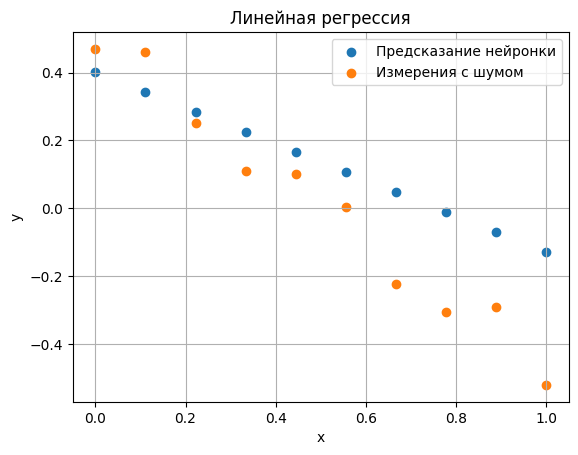

In [29]:
plt.scatter(x.detach().numpy(), sle_pred.detach().numpy(), label='Предсказание нейронки')
plt.scatter(x.detach().numpy(), y.detach().numpy(), label='Измерения с шумом')
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Линейная регрессия')
#plt.show()

### Цикл обучения

In [30]:
#optimizer = torch.optim.SGD( sle.parameters(), lr=1e-3)
optimizer = torch.optim.Adam( sle.parameters(), lr=1e-3)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [31]:
critarion = nn.MSELoss()
critarion

MSELoss()

In [32]:
# 1000 - ok, 100 - недообученная получается
MAX = 1000
for epoch in range(MAX):
    sle_pred = sle(x)
    # loss = torch.mean( ( y - sle_pred )**2 )
    loss = critarion(y, sle_pred)
    # стриаем предыдущий граф градиента
    optimizer.zero_grad()
    # обратное распространение ошибки
    loss.backward(retain_graph=True)
    # записываем новые коэфициента
    optimizer.step()
    if epoch % 20 == 0:
        print(f'Epoch [{epoch}/{MAX}], Loss: {loss.item():.4f}')

Epoch [0/1000], Loss: 0.0410
Epoch [20/1000], Loss: 0.0324
Epoch [40/1000], Loss: 0.0260
Epoch [60/1000], Loss: 0.0217
Epoch [80/1000], Loss: 0.0189
Epoch [100/1000], Loss: 0.0172
Epoch [120/1000], Loss: 0.0160
Epoch [140/1000], Loss: 0.0152
Epoch [160/1000], Loss: 0.0145
Epoch [180/1000], Loss: 0.0139
Epoch [200/1000], Loss: 0.0133
Epoch [220/1000], Loss: 0.0127
Epoch [240/1000], Loss: 0.0121
Epoch [260/1000], Loss: 0.0115
Epoch [280/1000], Loss: 0.0110
Epoch [300/1000], Loss: 0.0104
Epoch [320/1000], Loss: 0.0099
Epoch [340/1000], Loss: 0.0094
Epoch [360/1000], Loss: 0.0090
Epoch [380/1000], Loss: 0.0085
Epoch [400/1000], Loss: 0.0081
Epoch [420/1000], Loss: 0.0077
Epoch [440/1000], Loss: 0.0073
Epoch [460/1000], Loss: 0.0069
Epoch [480/1000], Loss: 0.0066
Epoch [500/1000], Loss: 0.0063
Epoch [520/1000], Loss: 0.0060
Epoch [540/1000], Loss: 0.0057
Epoch [560/1000], Loss: 0.0055
Epoch [580/1000], Loss: 0.0052
Epoch [600/1000], Loss: 0.0050
Epoch [620/1000], Loss: 0.0048
Epoch [640/100

In [33]:
#print( sle.fc[0].weight )
#print( sle.fc[0].bias )
print( sle.weight )
print( sle.bias )

Parameter containing:
tensor([[-0.9416]], requires_grad=True)
Parameter containing:
tensor([0.4756], requires_grad=True)


Text(0.5, 1.0, 'Линейная регрессия')

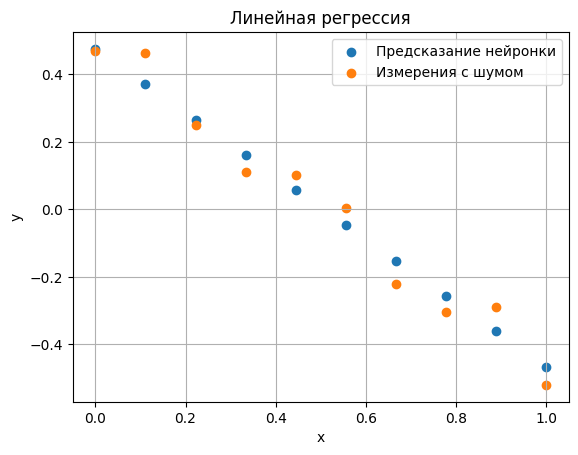

In [34]:
plt.scatter(x.detach().numpy(), sle_pred.detach().numpy(), label='Предсказание нейронки')
plt.scatter(x.detach().numpy(), y.detach().numpy(), label='Измерения с шумом')
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Линейная регрессия')
#plt.show()

### Опереляем погрешность аппроксимации

In [35]:
# среднее отклонение
torch.mean( critarion(y, sle_pred) )

tensor(0.0031, grad_fn=<MeanBackward0>)

In [36]:
#print( sle.fc[0].weight )
#print( sle.fc[0].bias )
print( sle.weight )
print( sle.bias )

Parameter containing:
tensor([[-0.9416]], requires_grad=True)
Parameter containing:
tensor([0.4756], requires_grad=True)


In [19]:
print(A)
print(B)
print(K_deviation)

-1
0.5
0.05
